# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [4]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [49]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /Users/hanluhe/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

Here we can see one of the images.

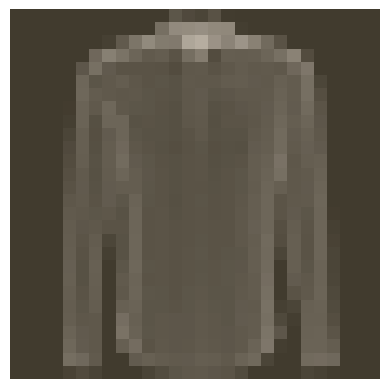

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [5]:
from torch import nn, optim

In [12]:
# TODO: Define your network architecture here
## Your solution here

class Network_M(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784,128)
        
        self.fc2 = nn.Linear(128,64)

        self.output = nn.Linear(64,10)

        # Define sigmoid activation and softmax output 
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self,x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.ReLU(x)
        x = self.fc2(x)
        x = self.ReLU(x)
        x = self.output(x)
        x = self.softmax(x)

        return x 
model = Network_M()


In [2]:
import numpy as np

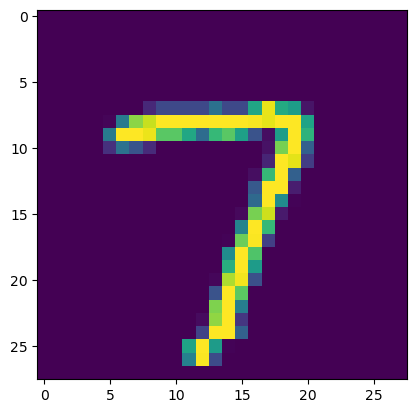

In [60]:
import matplotlib.pyplot as plt
train = np.load(path+'train_1.npz')
torch.from_numpy(train['images'])
plt.imshow(torch.from_numpy(train['images'])[100])

In [55]:
path = "/Users/hanluhe/Documents/MLops/dtu_mlops/data/corruptmnist/"

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

def mnist(path,training = True):
    # exchange with the corrupted mnist dataset

    if training == True:
        ## load all training datasets
        train_images = []
        train_labels = []

        for i in range(0,5):
            with np.load(path+'train_' +str(i)+'.npz') as f:
                images_train, labels_train = f['images'], f['labels']
                images_train_scaled = np.array([img/255. for img in images_train])
                train_images.append(torch.from_numpy(images_train_scaled))
                train_labels.append(torch.from_numpy(labels_train))
        return torch.cat(train_images,dim=0), train_labels 
        
    else:
        ## load test dataset
        test = np.load(path + "test.npz")

        images_test, labels_test = torch.from_numpy(test['images']), torch.from_numpy(test['labels'])
        test_images = torch.tensor([img/255. for img in images_test])

        return test_images, labels_test

train_images,train_labels = mnist(path,training=True)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [13]:
# TODO: Create the network, define the criterion and optimizer

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [14]:
# TODO: Train the network here

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass

        output = model(images) # forward pass 

        loss = criterion(output,labels) # calculate loss 

        loss.backward() # backward pass 

        running_loss += loss.item()

        optimizer.step()

        optimizer.zero_grad()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: -0.105055187016662
Training loss: -0.12323272901017275
Training loss: -0.18441986197284035
Training loss: -0.2693419482376275
Training loss: -0.34694025879983964


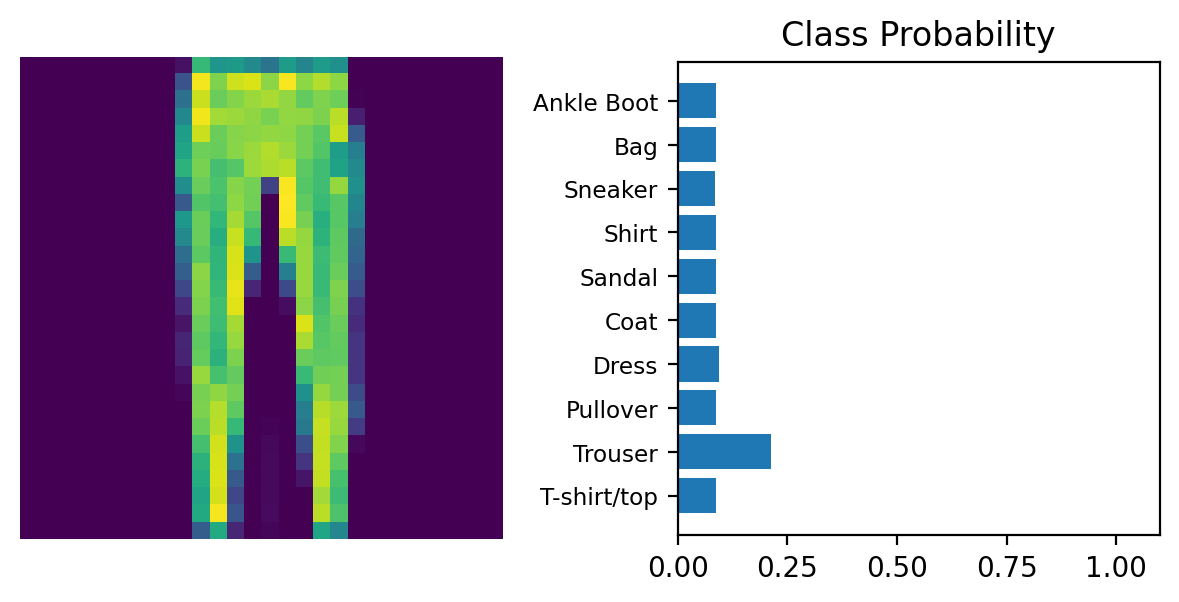

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

criterion = nn.Softmax(dim=1)
ps = criterion(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')